Purpose:

The purpose of the lab was to see the activity of the heart and to also see our EKG wave components.

Procedures:
For this lab what we did was use a EKG Recording and we connected the ECG electrodes. Black attatched to the right wrist, red connected to the left ankle, and green conected to the right ankle. We had to stay still and let the machine read our waves. and label (P, Q, R, S, and T).

Results:
graphed shown below

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
data = pd.read_csv (r'./ecg.txt', sep = '\t')
data

,Time,Lead II
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
6068,60.68,0.347272
6069,60.69,0.654251
6070,60.70,0.536051
6071,60.71,0.182478


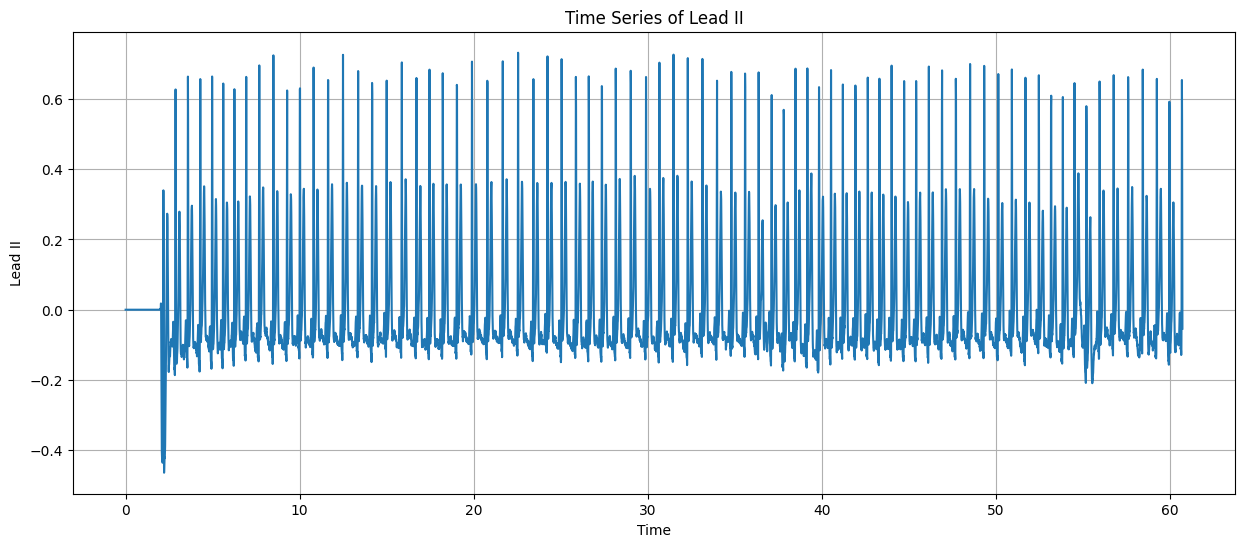

In [ ]:
df = pd.DataFrame(data)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

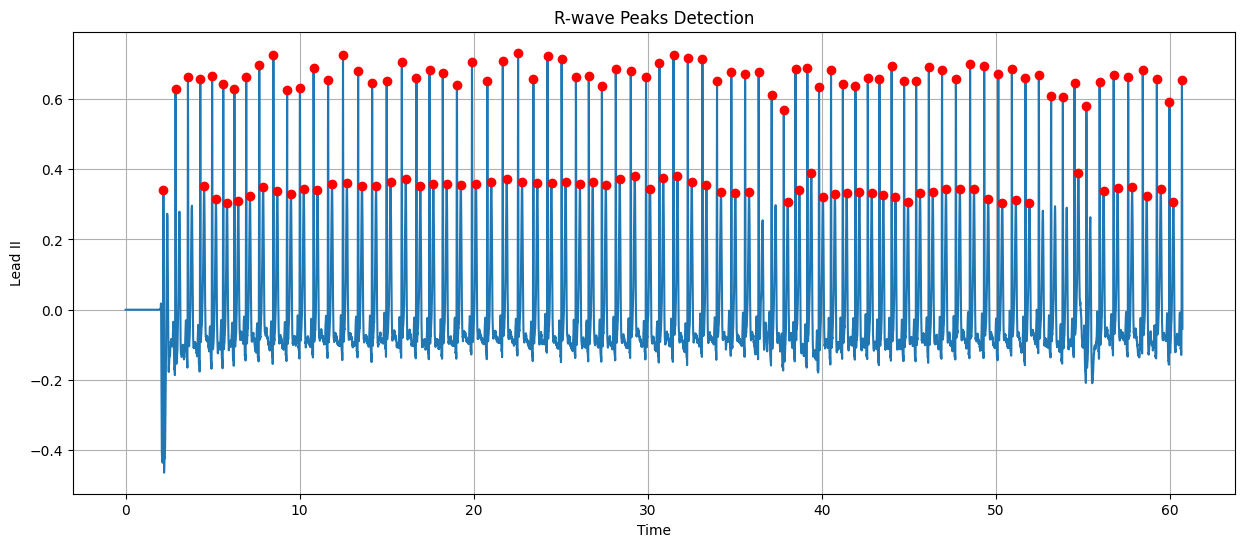

In [ ]:
# Detect R-wave peaks
peak_indices, _ = find_peaks(df['Lead II'], height=.3)  # You might need to adjust parameters like distance, height, etc.
# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.plot(df['Time'].iloc[peak_indices], df['Lead II'].iloc[peak_indices], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

In [ ]:
# Calculate RR intervals
rr_intervals = df['Time'].iloc[peak_indices].diff().dropna().values

# Calculate heart rate in BPM
average_rr_interval = rr_intervals.mean()
heart_rate = 60 / average_rr_interval

print(f"Average RR interval: {average_rr_interval:.2f} seconds")
print(f"Heart rate: {heart_rate:.2f} BPM")

Average RR interval: 0.41 seconds
Heart rate: 146.62 BPM


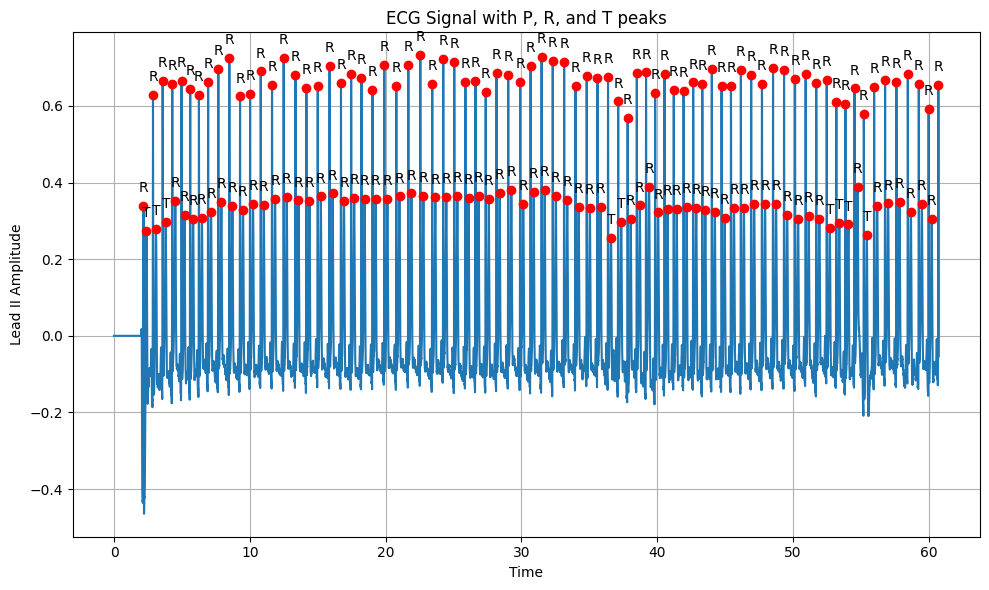

In [ ]:
# Detect all peaks without amplitude restriction
peaks, _ = find_peaks(df['Lead II'], distance=10, height=0.05) #Distance and height will need to change depending upon your data

# Classify peaks based on their amplitude
def classify_peak(amp):
    if amp > 0.3: #This height will depend on your data
        return 'R'
    elif 0.1 <= amp <= 0.3: #This height will depend on your data
        return 'T'
    else:
        return 'P'

labels = [classify_peak(df['Lead II'][peak]) for peak in peaks]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Lead II'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['Lead II'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['Lead II'][peak]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Time')
plt.ylabel('Lead II Amplitude')
plt.title('ECG Signal with P, R, and T peaks')
plt.grid(True)
plt.tight_layout()
plt.show()

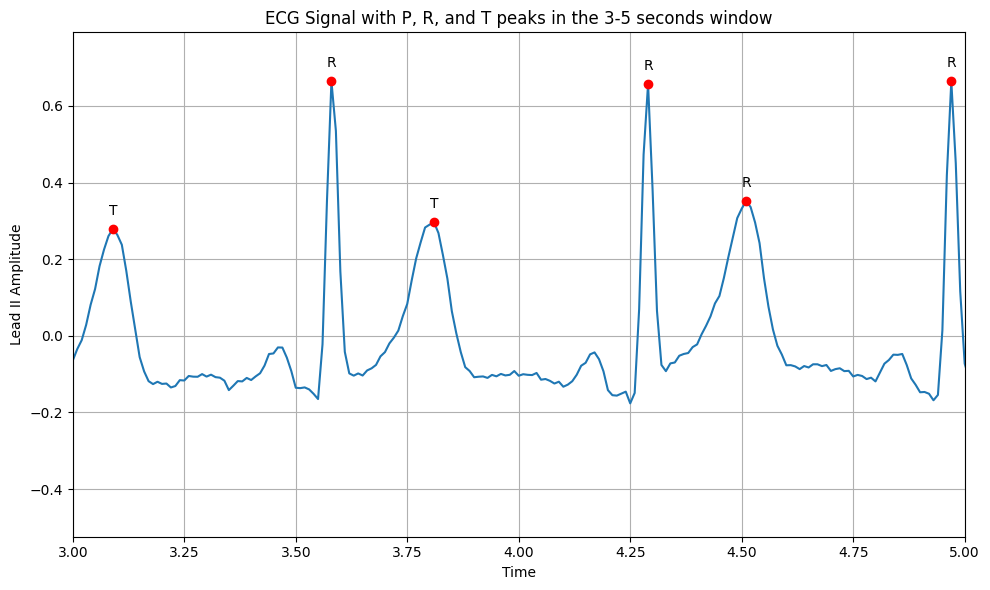

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Lead II'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['Lead II'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['Lead II'][peak]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Time')
plt.ylabel('Lead II Amplitude')
plt.title('ECG Signal with P, R, and T peaks in the 3-5 seconds window')
plt.grid(True)

# Set x-axis limits to zoom into the 3-5 seconds time window
plt.xlim(3, 5)

plt.tight_layout()
plt.show()

Discussion:
In discussion I noticed from my grapgh did more of a ventricular depolarization

Conclusion:
In conclusion my heart rate was 146 bpm and my rr interveral was 0.46 seconds had no P, Q, s only R and T